In [8]:
import os
os.sys.path
import time
import numpy as np
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
from keras.utils import normalize
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from numpy.fft import fft, fftfreq, ifft
import scipy
from scipy.fftpack import fft
from scipy.fftpack import dct
from scipy import fftpack
from scipy import signal
from scipy.signal import chirp
import csv
from scipy.signal import filtfilt
from scipy.signal import lfilter
from scipy import stats
from scipy.signal import butter, lfilter, lfilter_zi, normalize
import numpy as np
import pandas as pd
from sklearn import preprocessing
import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Conv1D, Conv2D, Dropout, Activation, MaxPool1D, MaxPool2D, Flatten
from sklearn.model_selection import train_test_split

import tensorflow as tf
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

from keras.layers import Conv3D, MaxPool3D, Flatten, Dense
from keras.layers import Dropout, Input, BatchNormalization
from sklearn.metrics import confusion_matrix, accuracy_score

from keras.losses import categorical_crossentropy
from keras.optimizers import Adadelta

from matplotlib.pyplot import cm
from keras.models import Model
import numpy as np
import keras
import h5py

In [2]:
Channels = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']

In [3]:
total_channels = 14
total_Person = 3 # This must be 23 as we have 23 subjects. 
total_Stimuli = 18

allStimuliData = []

for PersonCount in range(total_Person):
    for index in range(total_Stimuli):
        for channel in Channels:
            channelImage = cv2.imread('Spectograms/P' + str(PersonCount + 1) + '_S' + str(index + 1) + '_' + channel + '.jpg')
            channelImage = channelImage/255
            allStimuliData.append(channelImage)
      
    
allStimuliData = np.array(allStimuliData)
allStimuliData.shape


(756, 288, 432, 3)

In [4]:
#Class Distribution of Self assesment ratings for Arousal, Valence and Dominance
ratings = pd.read_csv('Dataset/Results/AllRatings.csv')
AllRatings = pd.DataFrame(ratings)

Arousal = []
Valence = []
Dominance = []

ArousalCountz = 0
ArousalCountone = 0

ValenceCountz = 0
ValenceCountone = 0

DominanceCountz = 0
DominanceCountone = 0

count = total_Person*total_Stimuli

values = AllRatings['Arousal']
for i in range(count):
    if values[i] < 2:
        for j in range(14): # As each 14 channel co-responds to 1 result for 1 stimuli, we are assigning same value for all the channel for each stimuli singals.
            Arousal.append([0]) # uninterested/bored
            ArousalCountz = ArousalCountz+1
    else:
        for j in range(14): # As each 14 channel co-responds to 1 result for 1 stimuli, we are assigning same value for all the channel for each stimuli singals.
            Arousal.append([1]) # excited/alert
            ArousalCountone = ArousalCountone+1
    
values = AllRatings['Valence']
for i in range(count):
    if values[i] <= 4:
        for j in range(14): # As each 14 channel co-responds to 1 result for 1 stimuli, we are assigning same value for all the channel for each stimuli singals.
            Valence.append([0]) # unpleasant/stressed
            ValenceCountz = ValenceCountz+1
    else:
        for j in range(14): # As each 14 channel co-responds to 1 result for 1 stimuli, we are assigning same value for all the channel for each stimuli singals.
            Valence.append([1]) # happy/elated
            ValenceCountone = ValenceCountone+1

        
values = AllRatings['Dominance']
for i in range(count):
    if values[i] > 4:
        for j in range(14): # As each 14 channel co responds to 1 result, we are assigning same value for all the channel for each stimuli singals.
            Dominance.append([0]) # helpless/Without Control
            DominanceCountz = DominanceCountz+1
    else:
        for j in range(14): # As each 14 channel co responds to 1 result, we are assigning same value for all the channel for each stimuli singals.
            Dominance.append([1]) # Empowered
            DominanceCountone = DominanceCountone+1

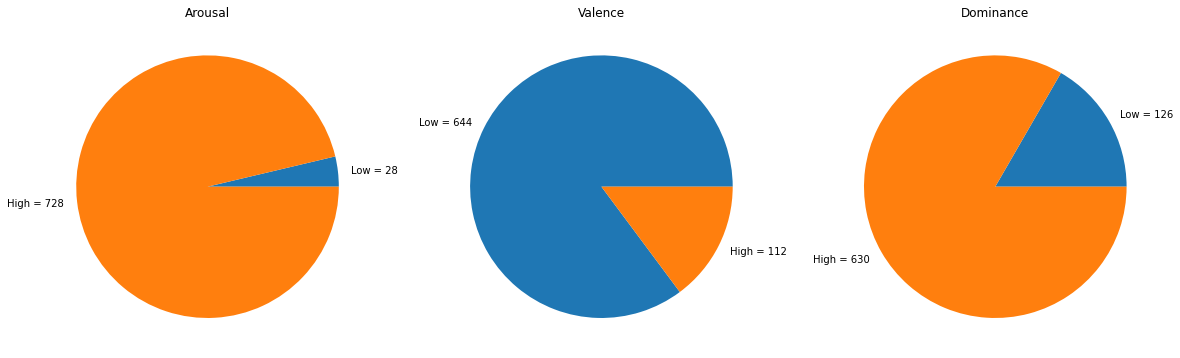

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 7))

# Creating plot 
ax1.pie([ArousalCountz,ArousalCountone], labels = ['Low = '+str(ArousalCountz),'High = '+str(ArousalCountone)]) 
ax1.set_title('Arousal')

ax2.pie([ValenceCountz,ValenceCountone], labels = ['Low = '+str(ValenceCountz),'High = '+str(ValenceCountone)]) 
ax2.set_title('Valence')

ax3.pie([DominanceCountz,DominanceCountone], labels = ['Low = '+str(DominanceCountz),'High = '+str(DominanceCountone)]) 
ax3.set_title('Dominance')

plt.show() 

In [6]:
arousal = np.array(Arousal)
valance = np.array(Valence)
dominance = np.array(Dominance)
print(arousal.shape, valance.shape, dominance.shape)

(756, 1) (756, 1) (756, 1)


In [7]:
#Arousal

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(2,2),padding='same', activation='relu', input_shape=[288,432,3]))

model.add(Conv2D(filters=32, kernel_size=(2,2), padding='same', activation='relu'))

model.add(Conv2D(filters=64, kernel_size=(2,2), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(units=64 , activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Split Train, Test
X_train, X_test, y_train, y_test = train_test_split(allStimuliData, arousal, test_size=0.3, random_state=0, stratify = arousal)


# fit network
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)


# evaluate model
_, accuracy = model.evaluate(X_test, y_test, batch_size=32, verbose=0)
acc = accuracy*100
print('Overall Accuracy -> %.3f' % (acc) +'%')


#ROC (Receiver operating characteristic) of AROUSAL
from sklearn.metrics import roc_curve
y_preds = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_preds)

# Getting the right threshold
import pandas as pd
i = np.arange(len(tpr)) 
roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'thresholds' : pd.Series(thresholds, index=i)})
ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]]  #Locate the point where the value is close to 0
threshold_value = float(ideal_roc_thresh['thresholds'])
print("Ideal threshold is: ", threshold_value) 

#Now use this threshold value in the confusion matrix to visualize the balance between tp, fp, fp, and fn

#Area under the curve (AUC) for ROC plot can be used to understand how well a classifier is performing. 
#% chance that the model can distinguish between positive and negative classes.

from sklearn.metrics import auc
auc_value = auc(fpr, tpr)
print("Area under curve, AUC = ", auc_value)

arousal_pred = (model.predict(X_test) >= threshold_value).astype("int32") # Setting a threshold.
cm = confusion_matrix(y_test, arousal_pred)
print(cm)

Epoch 1/10
17/17 [==============================] - 93s 5s/step - loss: 10.0077 - accuracy: 0.9200
Epoch 2/10
17/17 [==============================] - 78s 5s/step - loss: 0.1480 - accuracy: 0.9632
Epoch 3/10
17/17 [==============================] - 78s 5s/step - loss: 0.2267 - accuracy: 0.9597
Epoch 4/10
17/17 [==============================] - 79s 5s/step - loss: 0.2909 - accuracy: 0.9691
Epoch 5/10
17/17 [==============================] - 78s 5s/step - loss: 0.2039 - accuracy: 0.9548
Epoch 6/10
17/17 [==============================] - 78s 5s/step - loss: 0.1524 - accuracy: 0.9554
Epoch 7/10
17/17 [==============================] - 78s 5s/step - loss: 0.0944 - accuracy: 0.9657
Epoch 8/10
17/17 [==============================] - 78s 5s/step - loss: 0.1587 - accuracy: 0.9602
Epoch 9/10
17/17 [==============================] - 78s 5s/step - loss: 0.2184 - accuracy: 0.9475
Epoch 10/10
17/17 [==============================] - 78s 5s/step - loss: 0.0714 - accuracy: 0.9653
Overall Accuracy -

In [ ]:
#Valence

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(2,2),padding='same', activation='relu', input_shape=[288,432,3]))

model.add(Conv2D(filters=32, kernel_size=(2,2), padding='same', activation='relu'))

model.add(Conv2D(filters=64, kernel_size=(2,2), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(units=64 , activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Split Train, Test
X_train, X_test, y_train, y_test = train_test_split(allStimuliData, valance, test_size=0.3, random_state=0, stratify = valance)


# fit network
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)


# evaluate model
_, accuracy = model.evaluate(X_test, y_test, batch_size=32, verbose=0)
acc = accuracy*100
print('Overall Accuracy -> %.3f' % (acc) +'%')


#ROC (Receiver operating characteristic) of valance
from sklearn.metrics import roc_curve
y_preds = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_preds)

# Getting the right threshold
import pandas as pd
i = np.arange(len(tpr)) 
roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'thresholds' : pd.Series(thresholds, index=i)})
ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]]  #Locate the point where the value is close to 0
threshold_value = float(ideal_roc_thresh['thresholds'])
print("Ideal threshold is: ", threshold_value) 

#Now use this threshold value in the confusion matrix to visualize the balance between tp, fp, fp, and fn

#Area under the curve (AUC) for ROC plot can be used to understand how well a classifier is performing. 
#% chance that the model can distinguish between positive and negative classes.

from sklearn.metrics import auc
auc_value = auc(fpr, tpr)
print("Area under curve, AUC = ", auc_value)

valance_pred = (model.predict(X_test) >= threshold_value).astype("int32") # Setting a threshold.
cm = confusion_matrix(y_test, valance_pred)
print(cm)

In [ ]:
#Dominance

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(2,2),padding='same', activation='relu', input_shape=[288,432,3]))

model.add(Conv2D(filters=32, kernel_size=(2,2), padding='same', activation='relu'))

model.add(Conv2D(filters=64, kernel_size=(2,2), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(units=64 , activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Split Train, Test
X_train, X_test, y_train, y_test = train_test_split(allStimuliData, dominance, test_size=0.3, random_state=0, stratify = dominance)


# fit network
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)


# evaluate model
_, accuracy = model.evaluate(X_test, y_test, batch_size=32, verbose=0)
acc = accuracy*100
print('Overall Accuracy -> %.3f' % (acc) +'%')


#ROC (Receiver operating characteristic) of dominance
from sklearn.metrics import roc_curve
y_preds = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_preds)

# Getting the right threshold
import pandas as pd
i = np.arange(len(tpr)) 
roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'thresholds' : pd.Series(thresholds, index=i)})
ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]]  #Locate the point where the value is close to 0
threshold_value = float(ideal_roc_thresh['thresholds'])
print("Ideal threshold is: ", threshold_value) 

#Now use this threshold value in the confusion matrix to visualize the balance between tp, fp, fp, and fn

#Area under the curve (AUC) for ROC plot can be used to understand how well a classifier is performing. 
#% chance that the model can distinguish between positive and negative classes.

from sklearn.metrics import auc
auc_value = auc(fpr, tpr)
print("Area under curve, AUC = ", auc_value)

dominance_pred = (model.predict(X_test) >= threshold_value).astype("int32") # Setting a threshold.
cm = confusion_matrix(y_test, dominance_pred)
print(cm)